In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Replace 'file.csv' with the path to your CSV file
df = pd.read_csv('/content/MW.txt', delimiter='\t', header=None)

# Display DataFrame using display() function
display(df)



,0,1,2,3,4,5,6
0,0,0,MW,FP1,0,1017,"38,48,51,44,48,56,56,41,20,-3,-9,-1,6,5,6,17,2..."
1,1,1,MW,FP1,1,889,"83,74,65,65,66,55,43,25,18,20,26,33,41,38,28,3..."
2,2,2,MW,FP1,4,1017,"19,10,-2,-9,-5,3,8,7,8,2,-10,-21,-22,-27,-30,-..."
3,3,3,MW,FP1,1,1017,"17,29,36,26,21,17,17,13,17,21,25,26,20,5,-5,-1..."
4,4,4,MW,FP1,8,952,"77,74,69,70,76,75,76,75,67,66,76,93,98,82,55,3..."
...,...,...,...,...,...,...,...
67630,67630,67630,MW,FP1,-1,1024,"138,135,123,96,59,38,11,16,44,67,70,73,67,33,4..."
67631,67631,67631,MW,FP1,-1,1024,"4,5,-7,-12,-11,-17,2,52,73,55,12,-22,-7,38,43,..."
67632,67632,67632,MW,FP1,-1,1024,"96,163,208,179,129,114,140,155,108,56,28,9,-8,..."
67633,67633,67633,MW,FP1,-1,1024,"-30,4,53,85,84,72,80,85,65,23,-26,-42,-56,-146..."


In [ ]:
min_value = df.iloc[:, 5].min()
print(min_value)

441


In [ ]:
import numpy as np
import pandas as pd


y = df.iloc[:, 4]  # digits is the 5th column (index 4)
X_str = df.iloc[:, 6]  # column with comma-separated amplitudes is the 7th column (index 6)


X_str.replace('', np.nan, inplace=True)

# Split the comma-separated values and convert them to a DataFrame
X_df = pd.DataFrame(X_str.str.split(',').tolist())

# Convert the DataFrame to a 2D numpy array
X = X_df.iloc[:, :887].astype(float).values

# Print the first few rows of X to verify
print(X)


[[ 38.  48.  51. ...  20.  38.  61.]
 [ 83.  74.  65. ...   9.   2.  -7.]
 [ 19.  10.  -2. ... -23. -23. -20.]
 ...
 [ 96. 163. 208. ...  36.   4. -24.]
 [-30.   4.  53. ...  16.  10. -36.]
 [ 41.  27.  41. ... -34. -30.  11.]]


In [ ]:
print(X.shape)

(67635, 887)


In [ ]:
from collections import defaultdict
digit_series = defaultdict(list)

# Iterate through each row of the dataset
for index, row in df.iterrows():
    # Split the time series values by commas and convert them to integers
    values = list(map(int, row.iloc[6].split(',')))

    # Update the dictionary with the values corresponding to each digit
    for digit in str(row.iloc[4]):
        digit_series[digit].append(values)

# Calculate the average for each digit
averages = {digit: [sum(x) / len(digit_series[digit]) for x in zip(*digit_series[digit])] for digit in digit_series}

# Create a DataFrame from the averages
averages_df = pd.DataFrame.from_dict(averages, orient='index')
averages_df.index.name = 'Digits'

averages_df = averages_df.sort_index()
print(averages_df)


             0          1          2          3          4          5     \
Digits                                                                     
-       34.018739  33.791670  33.332179  33.077789  32.984174  32.893315   
0       32.958416  32.858615  32.897306  33.026577  32.973242  33.039053   
1       34.441178  34.331667  34.163910  34.104621  34.026925  33.956811   
2       35.027370  34.984231  35.033714  34.972449  34.804604  34.777778   
3       32.425591  32.251662  32.337888  32.319424  32.130539  32.328471   
4       34.909496  34.891470  34.892957  34.989035  35.003717  34.789630   
5       33.876257  33.898886  33.815194  33.832795  34.007902  34.300287   
6       32.709642  32.937546  33.210555  33.369248  33.271183  33.223521   
7       35.136527  35.207493  35.295569  35.285843  35.211095  35.020893   
8       34.274121  34.315780  34.480433  34.683679  34.714337  34.598738   
9       32.557798  32.547706  32.744220  32.884404  32.664220  32.367706   

           

In [ ]:
import numpy as np
import tensorflow as tf

X = []
for row in X_str:
    values = [x for x in row.split(',') if x != '']
    X.append(np.array([float(x) for x in values]))

# Pad the sequences to a fixed length
max_length = max(len(row) for row in X)
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=max_length, dtype='float32', padding='post')
X = np.expand_dims(X, axis=-1)  # Add a channel dimension

In [ ]:
# Find the last column without any NaN values
last_valid_col = None
for col in reversed(averages_df.columns):
    if averages_df[col].notna().all():
        last_valid_col = col
        break

print("Last column without any NaN values:", last_valid_col)


Last column without any NaN values: 440


In [ ]:
new_df = averages_df.iloc[:, :440]

print(new_df)

              0          1          2          3          4          5    \
Digits                                                                     
-       34.018739  33.791670  33.332179  33.077789  32.984174  32.893315   
0       32.958416  32.858615  32.897306  33.026577  32.973242  33.039053   
1       34.441178  34.331667  34.163910  34.104621  34.026925  33.956811   
2       35.027370  34.984231  35.033714  34.972449  34.804604  34.777778   
3       32.425591  32.251662  32.337888  32.319424  32.130539  32.328471   
4       34.909496  34.891470  34.892957  34.989035  35.003717  34.789630   
5       33.876257  33.898886  33.815194  33.832795  34.007902  34.300287   
6       32.709642  32.937546  33.210555  33.369248  33.271183  33.223521   
7       35.136527  35.207493  35.295569  35.285843  35.211095  35.020893   
8       34.274121  34.315780  34.480433  34.683679  34.714337  34.598738   
9       32.557798  32.547706  32.744220  32.884404  32.664220  32.367706   

           

In [ ]:
# Assuming your DataFrame is named 'new_df' and you want to save it as 'data.csv'
new_df.to_csv('data_final.csv')


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your CSV file (adjust the file path accordingly)
csv_file_path = "/content/data_final.csv"
df = pd.read_csv(csv_file_path, header=None)  # Assuming no header row

# Extract time series values for each digit (rows 0 to 9)
X = df.values  # X is your entire dataset (shape: 10 x 26

print(X)

[['Digits' 0.0 1.0 ... 437.0 438.0 439.0]
 ['-' 34.01873868199355 33.791669947248245 ... 33.210692071490435
  33.79245728682781 34.07755294858673]
 ['0' 32.95841619960224 32.858615078647624 ... 35.08985716868559
  34.93726270113903 34.72373892605315]
 ...
 ['7' 35.13652737752162 35.20749279538905 ... 32.429034582132566
  32.41156340057637 32.46397694524496]
 ['8' 34.2741208295762 34.31577998196573 ... 34.24129846708747
  34.01605049594229 33.726059513074844]
 ['9' 32.55779816513761 32.54770642201835 ... 35.67229357798165
  35.74422018348624 35.73155963302752]]


In [ ]:
# User input (3-digit number)
user_input = input("Enter a 3-digit number: ")
digit_1, digit_2, digit_3 = int(user_input[0]), int(user_input[1]), int(user_input[2])

Enter a 3-digit number: 457


In [ ]:
# Extract time series values for digit 1
time_series_digit_1 = df.iloc[digit_1].values
time_axis = range(439)
print(time_series_digit_1.shape)

(441,)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df_digit = pd.read_csv('/content/data_final.csv')


time_series_data = df_digit.loc[digit_1]
print(time_series_data.shape)

(441,)


In [ ]:
print(type(time_series_data[0]))


<class 'str'>


In [ ]:
time_series_data = time_series_data.astype(float)


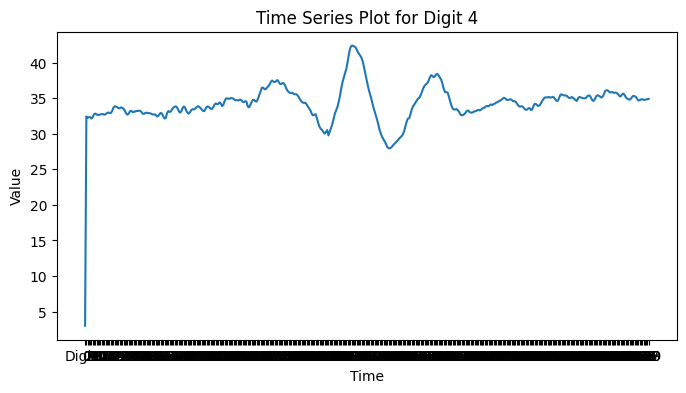

In [ ]:

plt.figure(figsize=(8, 4))
plt.plot(time_series_data)
plt.title(f"Time Series Plot for Digit {digit_1}")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()


(441,)


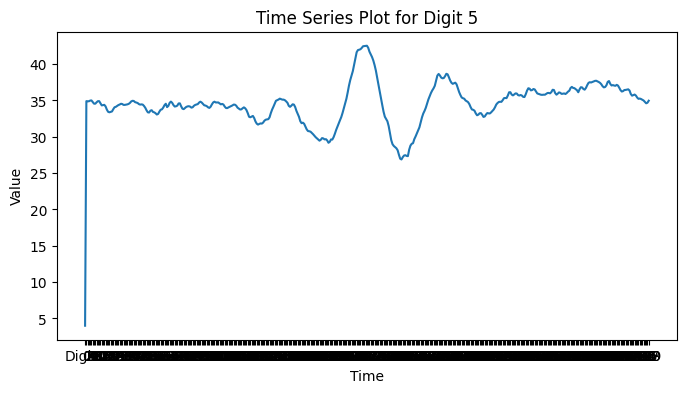

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df_digit = pd.read_csv('/content/data_final.csv')


time_series_data = df_digit.loc[digit_2]
print(time_series_data.shape)
time_series_data = time_series_data.astype(float)

plt.figure(figsize=(8, 4))
plt.plot(time_series_data)
plt.title(f"Time Series Plot for Digit {digit_2}")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()


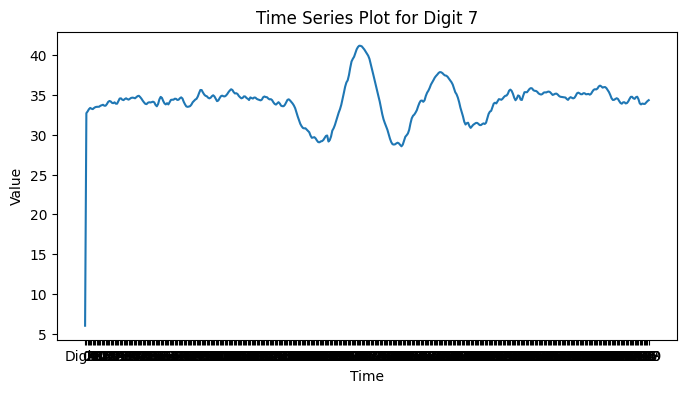

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df_digit = pd.read_csv('/content/data_final.csv')


time_series_data = df_digit.loc[digit_3]

time_series_data = time_series_data.astype(float)


plt.figure(figsize=(8, 4))
plt.plot(time_series_data)
plt.title(f"Time Series Plot for Digit {digit_3}")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()


In [ ]:
# Combine the time series values for the user input
combined_sequence = np.concatenate((X[digit_1], X[digit_2], X[digit_3]))
# print(combined_sequence)

In [ ]:
combined_sequence = combined_sequence.astype(float)

combined_sequence_normalized = (combined_sequence - np.min(combined_sequence)) / (np.max(combined_sequence) - np.min(combined_sequence))

In [ ]:
print(combined_sequence_normalized.shape)

(1323,)


In [ ]:
print(combined_sequence)

[ 2.         35.02736995 34.98423056 ... 35.94791667 36.14295977
 36.21174569]


In [ ]:
import numpy as np
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D, UpSampling1D, Input
from tensorflow.keras.models import Model

# Define input layer
input_layer = Input(shape=(combined_sequence.shape[0], 1))

# Define LSTM encoder layer
encoder_lstm = LSTM(64, activation='relu', return_sequences=True)(input_layer)

# Define 1D convolutional layers for feature extraction
conv1d_1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(encoder_lstm)
maxpooling_1 = MaxPooling1D(pool_size=2, padding='same')(conv1d_1)
conv1d_2 = Conv1D(filters=16, kernel_size=3, activation='relu', padding='same')(maxpooling_1)
maxpooling_2 = MaxPooling1D(pool_size=2, padding='same')(conv1d_2)

# Define LSTM decoder layer
decoder_lstm = LSTM(64, activation='relu', return_sequences=True)(maxpooling_2)

# Define 1D convolutional layers for upsampling and feature reconstruction
conv1d_3 = Conv1D(filters=16, kernel_size=3, activation='relu', padding='same')(decoder_lstm)
upsampling_1 = UpSampling1D(size=2)(conv1d_3)
conv1d_4 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(upsampling_1)
upsampling_2 = UpSampling1D(size=2)(conv1d_4)

# Define output layer
output_layer = Conv1D(filters=1, kernel_size=3, activation='linear', padding='same')(upsampling_2)

# Create autoencoder model
autoencoder_lstm_cnn = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
autoencoder_lstm_cnn.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
autoencoder_lstm_cnn.summary()
combined_sequence_normalized_reshaped = combined_sequence_normalized.reshape(-1, 1)

# Trim or pad the target sequence to match the expected length
target_sequence = np.concatenate([combined_sequence_normalized_reshaped, np.zeros((1324 - len(combined_sequence_normalized_reshaped), 1))])

# Reshape the target data to match the expected shape of the model output
target_data = target_sequence.reshape(1, -1, 1)

# Train the autoencoder
autoencoder_lstm_cnn.fit(combined_sequence_normalized_reshaped.reshape(1, -1, 1),
                          target_data,
                          epochs=50, batch_size=1, verbose=1)



Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 1323, 1)]         0         
                                                                 
 lstm_24 (LSTM)              (None, 1323, 64)          16896     
                                                                 
 conv1d_60 (Conv1D)          (None, 1323, 32)          6176      
                                                                 
 max_pooling1d_24 (MaxPooli  (None, 662, 32)           0         
 ng1D)                                                           
                                                                 
 conv1d_61 (Conv1D)          (None, 662, 16)           1552      
                                                                 
 max_pooling1d_25 (MaxPooli  (None, 331, 16)           0         
 ng1D)                                                    

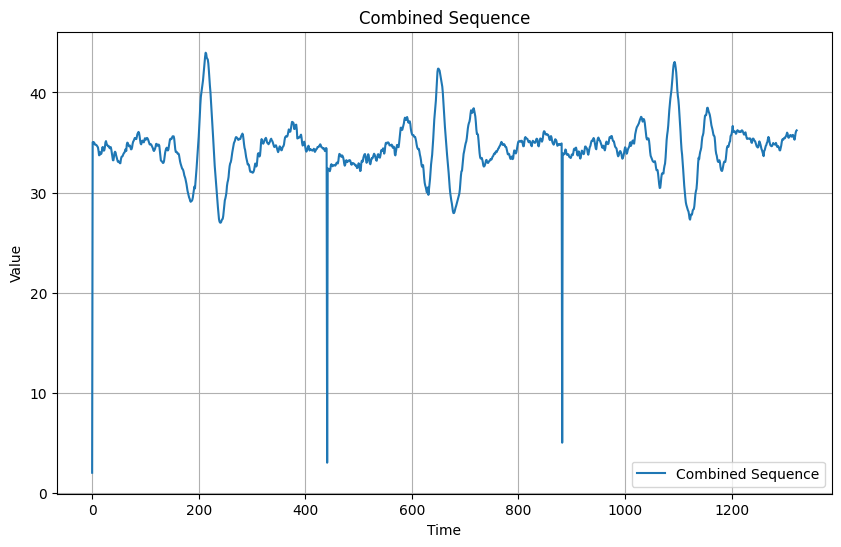

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(combined_sequence, label="Combined Sequence")
plt.title("Combined Sequence")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


1/1 [==============================] - 1s 639ms/step


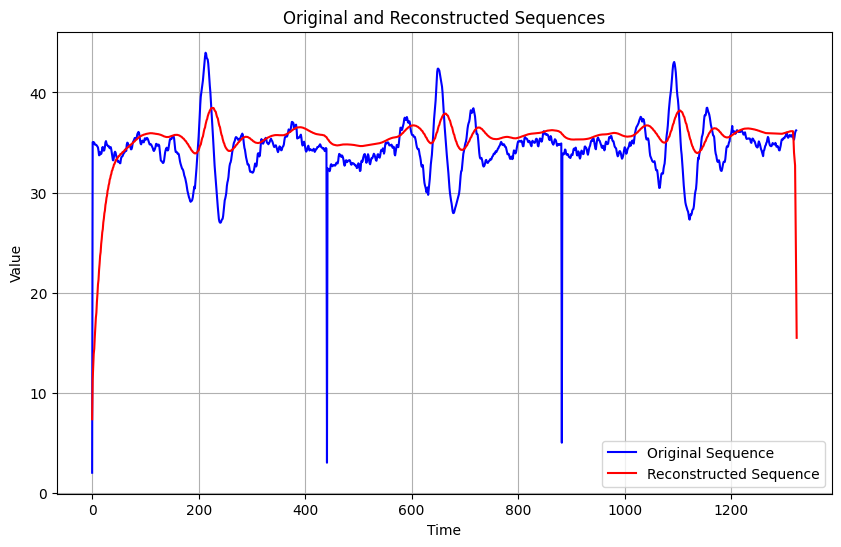

In [ ]:
import matplotlib.pyplot as plt

# Predict the reconstructed sequence
reconstructed_sequence_normalized_lstm_cnn = autoencoder_lstm_cnn.predict(combined_sequence_normalized_reshaped.reshape(1, -1, 1))

# Denormalize the reconstructed sequence (if you normalized the data)
reconstructed_sequence_lstm_cnn = (reconstructed_sequence_normalized_lstm_cnn *
                                   (np.max(combined_sequence) - np.min(combined_sequence)) +
                                   np.min(combined_sequence))

# Plot the original and reconstructed sequences
plt.figure(figsize=(10, 6))
plt.plot(combined_sequence, label='Original Sequence', color='blue')
plt.plot(reconstructed_sequence_lstm_cnn.flatten(), label='Reconstructed Sequence', color='red')
plt.title('Original and Reconstructed Sequences')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(input_data.shape)
print(reconstructed_data.shape)

(1, 1323, 1)
(1, 1324, 1)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming you have the input_data and reconstructed_data
input_data = combined_sequence_normalized_reshaped.reshape(1, -1, 1)
reconstructed_data = autoencoder_lstm_cnn.predict(input_data)

# Trim the reconstructed data to match the input data shape
reconstructed_data_trimmed = reconstructed_data[:, :1323, :]

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE)
mse_score = mean_squared_error(input_data.flatten(), reconstructed_data_trimmed.flatten())
mae_score = mean_absolute_error(input_data.flatten(), reconstructed_data_trimmed.flatten())

print("Mean Squared Error (MSE):", mse_score)
print("Mean Absolute Error (MAE):", mae_score)


1/1 [==============================] - 0s 87ms/step
Mean Squared Error (MSE): 0.006845178518097039
Mean Absolute Error (MAE): 0.05085892582002892
